In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings as fw
fw('ignore')

In [2]:
df = pd.read_csv('news.csv')
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [3]:
del df['Unnamed: 0']

In [4]:
df.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   6335 non-null   object
 1   text    6335 non-null   object
 2   label   6335 non-null   object
dtypes: object(3)
memory usage: 148.6+ KB


In [6]:
df['title-length'] = df['title'].str.len()
df['text-length'] = df['text'].str.len()

In [7]:
df

,title,text,label,title-length,text-length
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,28,7518
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,85,2646
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,43,2543
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,84,2660
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,48,1840
...,...,...,...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL,69,4076
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE,59,14323
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE,66,11974
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL,67,6991


In [8]:
df.groupby('label').describe().T

label                        FAKE          REAL
title-length count    3164.000000   3171.000000
             mean       69.180784     61.383160
             std        27.084770     19.056875
             min         1.000000     10.000000
             25%        51.000000     48.000000
             50%        68.000000     61.000000
             75%        84.000000     73.000000
             max       289.000000    148.000000
text-length  count    3164.000000   3171.000000
             mean     4121.046460   5292.160202
             std      5680.232733   4348.288284
             min         1.000000     43.000000
             25%      1283.500000   2729.500000
             50%      2558.000000   4683.000000
             75%      5027.000000   6829.500000
             max    115372.000000  44039.000000

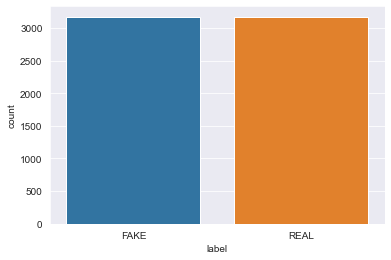

In [9]:
sns.set_style('darkgrid')
sns.countplot(x = 'label', data = df)

## Data Cleansing and Preprocessing
1. Removing ,!? etc using Regex
2. Converting to lower case
3. Spliting the messages into words
4. Removing the stop words using stopwords and punctuations(if any left)
5. Applying lematization/stemming to words (excluding stop words)
6. Joining the words back into a sentence

In [10]:
import nltk
from string import punctuation
import re
from nltk.corpus import stopwords, wordnet
from nltk.stem import PorterStemmer, WordNetLemmatizer
lemma = WordNetLemmatizer()
stemmer = PorterStemmer()

In [11]:
def clean_text(t):
    t = re.sub(r'[^a-zA-Z]', ' ', t)
    t = t.lower()
    t = ' '.join([stemmer.stem(word) for word in t.split() if (word not in stopwords.words('english')) and (word not in punctuation)])
    return t

In [12]:
df['Clean_title'] = df['title'].apply(clean_text)
df['Clean_text'] = df['text'].apply(clean_text)

In [13]:
df.head()

,title,text,label,title-length,text-length,Clean_title,Clean_text
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,28,7518,smell hillari fear,daniel greenfield shillman journal fellow free...
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,85,2646,watch exact moment paul ryan commit polit suic...,googl pinterest digg linkedin reddit stumbleup...
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,43,2543,kerri go pari gestur sympathi,u secretari state john f kerri said monday sto...
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,84,2660,berni support twitter erupt anger dnc tri warn,kayde king kaydeek novemb lesson tonight dem l...
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,48,1840,battl new york primari matter,primari day new york front runner hillari clin...


## Visualing Data

In [14]:
from wordcloud import WordCloud

In [21]:
fake_words = ' '.join(list(df['text'][df['label'] == 'FAKE']))
real_words = ' '.join(list(df['text'][df['label'] == 'REAL']))

Text(0.5, 0.98, 'Real Words')

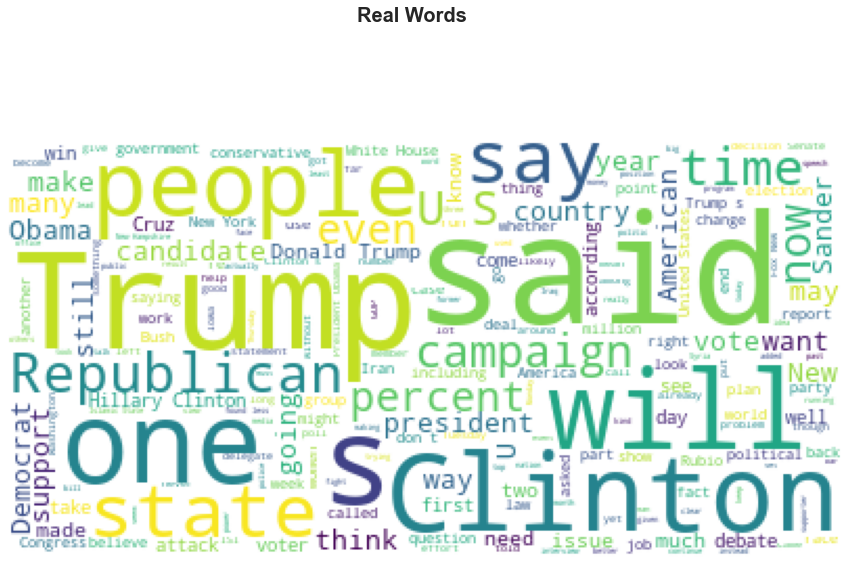

In [22]:
real_wc = WordCloud(background_color="white", max_words=len(real_words)).generate(real_words)
plt.figure(figsize =(15, 10))
plt.imshow(real_wc)
plt.axis('off')
plt.suptitle('Real Words', fontweight = 'bold', fontsize = 20)

Text(0.5, 0.98, 'Fake Words')

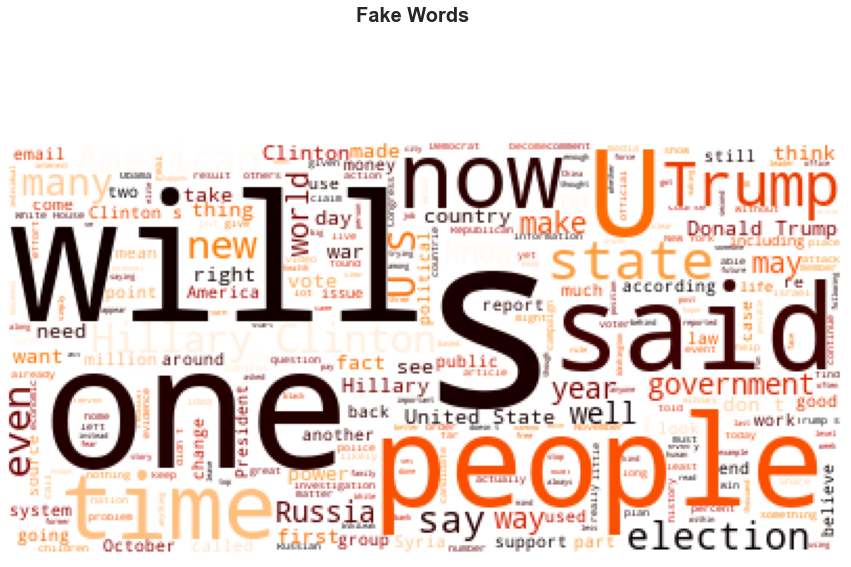

In [23]:
fake_wc = WordCloud(background_color="white", max_words=len(fake_words), colormap='gist_heat').generate(fake_words)
plt.figure(figsize =(15, 10))
plt.imshow(fake_wc)
plt.axis('off')
plt.suptitle('Fake Words', fontweight = 'bold', fontsize = 20)

### Transforming text to feature vectors that can be used as input to estimator

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
tfidfV_title = TfidfVectorizer()
tfidfV_text = TfidfVectorizer()

In [41]:
# tf_idf_title = tfidfV_title.fit_transform(df['Clean_title'])
tf_idf_text = tfidfV_text.fit_transform(df['Clean_text'])

In [42]:
# tf_df_title = pd.DataFrame(tf_idf_title.toarray(), columns = tfidfV_title.get_feature_names())
tf_df_text = pd.DataFrame(tf_idf_text.toarray(), columns = tfidfV_text.get_feature_names())

In [28]:
tf_df_title.shape

(6335, 6884)

In [29]:
tf_df_text.shape

(6335, 43733)

In [30]:
tf_df = pd.concat([tf_df_title, tf_df_text], axis = 1)

In [31]:
tf_df

,aap,abadi,abandon,abbi,abc,abduct,abdullah,abedin,abil,abl,...,zwick,zwicker,zwischenmenschlich,zwvgl,zxua,zxycmwjdxj,zybvwqhlbctginctv,zyuganov,zyz,zz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6330,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6331,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6332,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
# tf_df = tf_df.astype('uint8')
tf_df_text = tf_df_text.astype('uint8')

## Model Building

In [32]:
from sklearn.model_selection import train_test_split

In [44]:
x = tf_df_text
y = df['label']

In [34]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
import numpy as np
import scikitplot as skplt

In [35]:
def models(model, x, y):
#     splitting the data
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 0)
    
    model.fit(xtrain, ytrain)
    
    ypred = model.predict(xtest)
    y_probas = model.predict_proba(xtest)
    
    cv_score = cross_val_score(model,x,y,cv= 10)
    
    print('Training Score: ', round((model.score(xtrain, ytrain))*100, 2), '%')
    print('Testing Score: ', round((model.score(xtest, ytest))*100, 2), '%')
    print("Cross Val scoe: ", round((np.mean(cv_score)*100), 2), '%')
    print(confusion_matrix(ytest, ypred))
    print(classification_report(ytest, ypred))
    skplt.metrics.plot_roc(ytest, y_probas, figsize=(12,8), title_fontsize=12, text_fontsize=16)
    plt.show()
    skplt.metrics.plot_precision_recall(ytest, y_probas, figsize=(12,8), title_fontsize=12, text_fontsize=16)
    plt.show()

Training Score:  50.45 %
Testing Score:  48.42 %
Cross Val scoe:  50.06 %
[[767   0]
 [817   0]]
              precision    recall  f1-score   support

        FAKE       0.48      1.00      0.65       767
        REAL       0.00      0.00      0.00       817

    accuracy                           0.48      1584
   macro avg       0.24      0.50      0.33      1584
weighted avg       0.23      0.48      0.32      1584



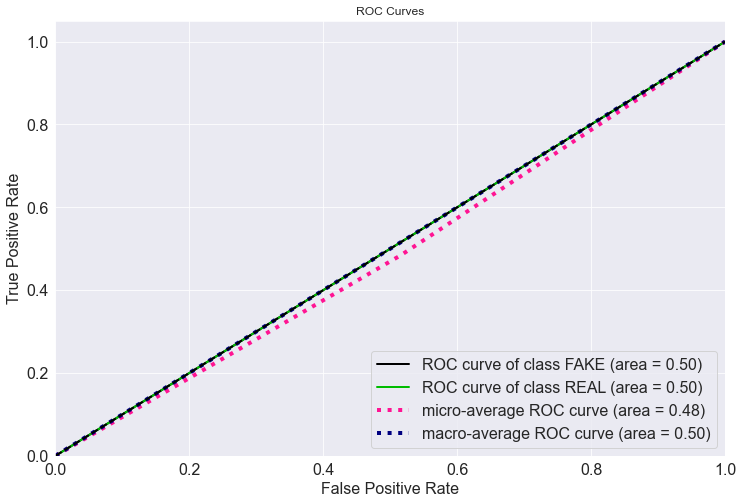

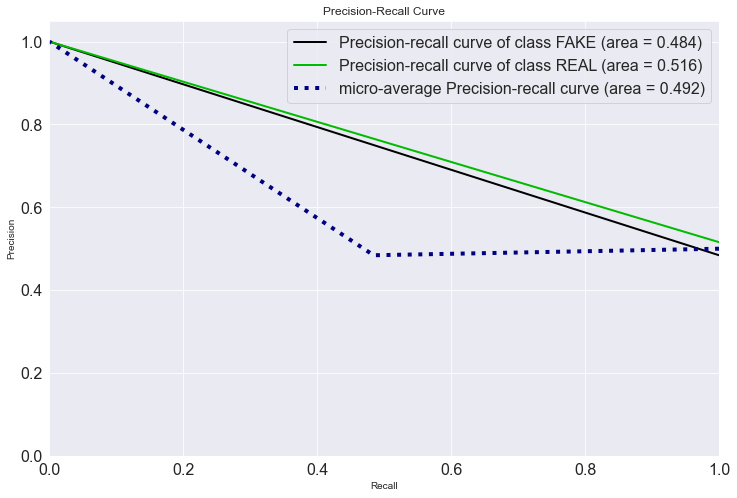

In [45]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
models(model, x, y)